Creating train/test split

In [2]:
import pandas as pd

df_ml = pd.read_parquet("../data/processed/TSLA_ml.parquet")

# Ensure sorted by Date (safety)
df_ml = df_ml.sort_index()

# Time-based split
split = int(len(df_ml) * 0.8)

train_df = df_ml.iloc[:split]
test_df = df_ml.iloc[split:]

train_df.shape, test_df.shape


((183, 24), (46, 24))

In [3]:
feature_cols = [col for col in df_ml.columns if col != "Target"]

X_train = train_df[feature_cols]
y_train = train_df["Target"]

X_test = test_df[feature_cols]
y_test = test_df["Target"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((183, 23), (183,), (46, 23), (46,))

Gradient Boosting

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

gbr.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, n_estimators=300, random_state=42,
                          subsample=0.8)

In [8]:
y_pred_gbr = gbr.predict(X_test)


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mape_gbr = (abs(y_test - y_pred_gbr) / y_test).mean() * 100

rmse_gbr, mae_gbr, mape_gbr


c:\Users\Vivoboook\anaconda3\envs\ShreeyanM2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(23.614915680614697, 20.41388150985028, 4.614663712429974)

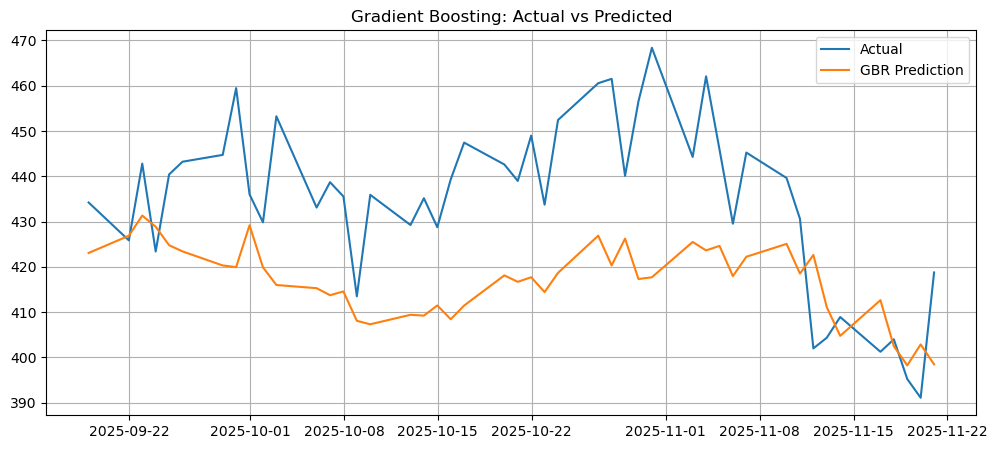

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test.values, label="Actual")
plt.plot(y_test.index, y_pred_gbr, label="GBR Prediction")
plt.grid(True)
plt.legend()
plt.title("Gradient Boosting: Actual vs Predicted")
plt.show()


In [11]:
import pandas as pd

importance = pd.Series(gbr.feature_importances_, index=X_train.columns)
importance.sort_values(ascending=False).head(15)


Close           0.751714
High            0.110548
Low             0.042159
MACD            0.018798
Signal          0.017711
Volatility20    0.005565
Open            0.005311
MACD_Hist       0.004202
VolMA20         0.003977
Lag1            0.003829
VolMA10         0.003782
MA10            0.003642
VolMA5          0.003639
RSI14           0.003253
Lag5            0.002990
dtype: float64